# 3 Виконання

## 3.1 Представити корпус як модель «Сумка слів». Вивести вектор для слова «film».

### Зчитаємо текст з файлу та імпортуємо модулі nltk, pandas, numpy, re.

In [113]:
import nltk
import pandas as pd
import numpy as np
import re
with open('data/doc1.txt', 'r') as file:
    corpus = file.readlines()
corpus

['Whisk the lime juice, oil, chipotle powder, salt, and cumin together in a large bowl. Add the shrimp and toss to combine.\n',
 'Growth in Japan evaporated in the three months to September, sparking renewed concern about an economy not long out of a decade-long trough.\n',
 'The independent film festival will feature two new international cinema competitions.\n',
 'Serve the shrimp with the tortillas and salsa.\n',
 'Twelve films competing in the new world cinema documentary category.\n',
 'The economy had stagnated throughout the 1990s.\n',
 'Actor Daniel Day-Lewis is to be presented with an award for his career in film at the Berlin Film Festival.']

*Зчитування файлу*

### Задамо теми кожного документу.

In [114]:
labels = ['food', 'economics', 'films', 'food',
          'films', 'economics', 'films']
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df

,Document,Category
0,"Whisk the lime juice, oil, chipotle powder, sa...",food
1,Growth in Japan evaporated in the three months...,economics
2,The independent film festival will feature two...,films
3,Serve the shrimp with the tortillas and salsa.\n,food
4,Twelve films competing in the new world cinema...,films
5,The economy had stagnated throughout the 1990s.\n,economics
6,Actor Daniel Day-Lewis is to be presented with...,films


*Теми документів*

### Визначимо стоп-слова англійської мови.

In [115]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

*Стоп-слова*

### Визначимо функцію, що виконує попередню обробку документу. Застосуємо декоратор np.vectorize для того, щоб функція могла працювати з корпусами.

In [116]:
@np.vectorize
def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

p_corpus = preproc_doc(corpus)
p_corpus

array(['whisk lime juice oil chipotle powder salt cumin together large bowl add shrimp toss combine',
       'growth japan evaporated three months september sparking renewed concern economy long decadelong trough',
       'independent film festival feature two new international cinema competitions',
       'serve shrimp tortillas salsa',
       'twelve films competing new world cinema documentary category',
       'economy stagnated throughout',
       'actor daniel daylewis presented award career film berlin film festival'],
      dtype='<U102')

*Обробка документів*

### Представимо корпус як модуль "Сумка слів". Використаємо для цього клас CountVectorizer зі sklearn.feature_extraction.text.

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(p_corpus)
cv_matrix = pd.DataFrame(cv_matrix.toarray(), 
                         columns=cv.get_feature_names_out())
cv_matrix

,actor,add,award,berlin,bowl,career,category,chipotle,cinema,combine,...,three,throughout,together,tortillas,toss,trough,twelve,two,whisk,world
0,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Сумка слів*

### Виведемо вектор слова "film".

In [118]:
cv_matrix['film'].values

array([0, 0, 1, 0, 0, 0, 2])

*Вектор слова "film"*

## 3.2 Представити   корпус   як   модель TD-IDF. Спробувати кластеризувати   документи   за   допомогою   ієрархічної агломераційної кластеризації. 

### Перетворимо матрицю з частотою термінів на матрицю tfidf.

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
tv_matrix = pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)
tv_matrix

,actor,add,award,berlin,bowl,career,category,chipotle,cinema,combine,...,three,throughout,together,tortillas,toss,trough,twelve,two,whisk,world
0,0.00,0.26,0.00,0.00,0.26,0.00,0.00,0.26,0.00,0.26,...,0.00,0.00,0.26,0.00,0.26,0.00,0.00,0.00,0.26,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.28,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.52,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.00,0.31,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.00,0.00,0.37
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.31,0.00,0.31,0.31,0.00,0.31,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


*Матриця TF-IDF*

### Обрахуємо подібність векторів за допомогою косинусної відстані.

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_matrix = pd.DataFrame(similarity_matrix)
similarity_matrix

,0,1,2,3,4,5,6
0,1.000000,0.000000,0.000000,0.095032,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.117419,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.184013,0.000000,0.230036
3,0.095032,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.184013,0.000000,1.000000,0.000000,0.000000
5,0.000000,0.117419,0.000000,0.000000,0.000000,1.000000,0.000000
6,0.000000,0.000000,0.230036,0.000000,0.000000,0.000000,1.000000


*Матриця подібності*

### На основі матриці подібності побудуємо матрицю зв'язку.

In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage
columns = ['Document\Cluster 1', 'Document\Cluster 2',
           'Distance', 'Cluster Size']
links = pd.DataFrame(linkage(similarity_matrix, 'ward'),
                     columns=columns)
links

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2.0,6.0,1.104333,2.0
1,1.0,5.0,1.248158,2.0
2,0.0,3.0,1.279817,2.0
3,4.0,7.0,1.360619,3.0
4,8.0,9.0,1.564520,4.0
5,10.0,11.0,1.709146,7.0


*Матриця зв'язку*

### Візуалізуємо зв'язки за допомогою дендрограми.

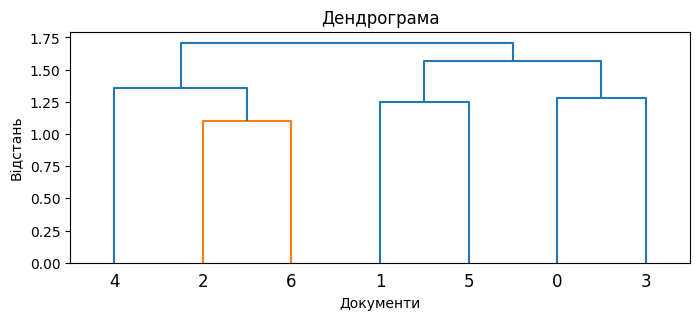

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.title('Дендрограма')
plt.xlabel('Документи')
plt.ylabel('Відстань')
d = dendrogram(links, )

*Дендрограма*

### Отримаємо мітки кластерів. Бачимо, що кластери зливаються приблизно на відстані 1.5.

In [123]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.5
cluster_labels = fcluster(links, max_dist,
                          criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels,
columns=['ClusterLabel'])
corpus_df = pd.concat([corpus_df, cluster_labels], axis=1)
corpus_df

,Document,Category,ClusterLabel
0,"Whisk the lime juice, oil, chipotle powder, sa...",food,3
1,Growth in Japan evaporated in the three months...,economics,2
2,The independent film festival will feature two...,films,1
3,Serve the shrimp with the tortillas and salsa.\n,food,3
4,Twelve films competing in the new world cinema...,films,1
5,The economy had stagnated throughout the 1990s.\n,economics,2
6,Actor Daniel Day-Lewis is to be presented with...,films,1


*Додавання міток*

## 3.3 Представити корпус як модель Word2Vec. Знайти подібні слова до слів shrimp, economy.

### Побудуємо модель Word2Vec.

In [124]:
from gensim.models import word2vec
tokenized_corpus = [wpt.tokenize(document) for document in p_corpus]
feature_size = 100
window_context = 30
min_word_count = 1
sample = 1e-3
w2v_model = word2vec.Word2Vec(tokenized_corpus,
                              vector_size=feature_size,
                              window=window_context, 
                              min_count=min_word_count,
                              sample=sample)


*Модель Word2Vec*

### Подивимося подібні слова до "shrimp", "economy".

In [125]:
similar_words = {
  search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term],topn=5)]
      for search_term in ['shrimp', 'economy']}
similar_words

{'shrimp': ['evaporated', 'juice', 'stagnated', 'long', 'new'],
 'economy': ['months', 'long', 'shrimp', 'cinema', 'world']}

*Виведення подібних слів*